# Method 1

## Approach

- First convert LULC to 5 classes; {urban, water, grassland, forest, barren}. Then find initial threshold for NDVI+RD+NTL Urban region by pixel matching with LULC Urban class. Urban-Peri-urban threshold can be forced this way for now.
- Noting water pixels from LULC to use later.
- We then use NTL estimates for Rural-Peri-urban boundary as mentioned by Hiten Vidhani (that is 0-3,3-X) and force a threshold for the lower limit across NDVI and RD. 
- Collocate all data.

In [97]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport


In [98]:
lulc = pd.read_csv("lulc2013-2020.ascii",delim_whitespace=" ",header=None)
NDVI = pd.read_csv("ndvi2013-2020.ascii",delim_whitespace=" ",header=None)
RD = pd.read_csv("road2013-2020.ascii",delim_whitespace=" ",header=None)
NTL = pd.read_csv("light2013-2020.ascii",delim_whitespace=" ",header=None)

features = ['LAT', 'LON', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

lulc.columns=features
NDVI.columns=features
RD.columns=features
NTL.columns=features

In [99]:
label = [None] * 26458

NDVI['LABEL2013'] = label
NDVI['LABEL2014'] = label
NDVI['LABEL2015'] = label
NDVI['LABEL2016'] = label
NDVI['LABEL2017'] = label
NDVI['LABEL2018'] = label
NDVI['LABEL2019'] = label
NDVI['LABEL2020'] = label

NTL['LABEL2013'] = label
NTL['LABEL2014'] = label
NTL['LABEL2015'] = label
NTL['LABEL2016'] = label
NTL['LABEL2017'] = label
NTL['LABEL2018'] = label
NTL['LABEL2019'] = label
NTL['LABEL2020'] = label

RD['LABEL2013'] = label
RD['LABEL2014'] = label
RD['LABEL2015'] = label
RD['LABEL2016'] = label
RD['LABEL2017'] = label
RD['LABEL2018'] = label
RD['LABEL2019'] = label
RD['LABEL2020'] = label

In [100]:
for i in range(26458):
    for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
            if lulc[x].loc[i] == 1: # Forest
                lulc[x].loc[i] = 1 
            elif lulc[x].loc[i] == 2: # Forest
                lulc[x].loc[i] = 1 
            elif lulc[x].loc[i] == 3: # Forest
                lulc[x].loc[i] = 1
            elif lulc[x].loc[i] == 4: # Forest
                lulc[x].loc[i] = 1
            elif lulc[x].loc[i] == 5: # Forest
                lulc[x].loc[i] = 1
            elif lulc[x].loc[i] == 6: # Forest
                lulc[x].loc[i] = 1
            elif lulc[x].loc[i] == 7: # Forest
                lulc[x].loc[i] = 1
            elif lulc[x].loc[i] == 8: # Forest
                lulc[x].loc[i] = 1
            elif lulc[x].loc[i] == 9: # Forest
                lulc[x].loc[i] = 1
            elif lulc[x].loc[i] == 10: # Woodland
                lulc[x].loc[i] = 2
            elif lulc[x].loc[i] == 11: # Water 
                lulc[x].loc[i] = 3
                NDVI['LABEL'+x].loc[i] = 'Water'
                NTL['LABEL'+x].loc[i] = 'Water'
                RD['LABEL'+x].loc[i] = 'Water'
            elif lulc[x].loc[i] == 12: # Crop
                lulc[x].loc[i] = 4
            elif lulc[x].loc[i] == 13: # Urban
                lulc[x].loc[i] = 5
                NDVI['LABEL'+x].loc[i] = 'Urban'
                NTL['LABEL'+x].loc[i] = 'Urban'
                RD['LABEL'+x].loc[i] = 'Urban'
            elif lulc[x].loc[i] == 14: # Crop
                lulc[x].loc[i] = 4
            elif lulc[x].loc[i] == 15: # Water
                lulc[x].loc[i] = 3
                NDVI['LABEL'+x].loc[i] = 'Water'
                NTL['LABEL'+x].loc[i] = 'Water'
                RD['LABEL'+x].loc[i] = 'Water'
            elif lulc[x].loc[i] == 16: # Barren
                lulc[x].loc[i] = 6
            elif lulc[x].loc[i] == 17: # Water
                lulc[x].loc[i] = 3
                NDVI['LABEL'+x].loc[i] = 'Water'
                NTL['LABEL'+x].loc[i] = 'Water'
                RD['LABEL'+x].loc[i] = 'Water'

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [101]:
profileNDVI = ProfileReport(NDVI, title="NDVI")
profileNTL = ProfileReport(NTL, title="NTL")
profileRD = ProfileReport(RD, title="RD")
profileNDVI.to_file("NDVI_Report.html")
profileNTL.to_file("NTL_Report.html")
profileRD.to_file("RD_Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 91.61it/s]


In [102]:
for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
    NDVI_Urban = NDVI[(NDVI['LABEL'+x] == 'Urban')]
    RD_Urban = RD[(RD['LABEL'+x] == 'Urban')]
    NTL_Urban = NTL[(NTL['LABEL'+x] == 'Urban')]

In [103]:
profileNDVI_Urban = ProfileReport(NDVI_Urban, title="NDVI")
profileNTL_Urban = ProfileReport(NTL_Urban, title="NTL")
profileRD_Urban = ProfileReport(RD_Urban, title="RD")
profileNDVI_Urban.to_file("NDVI_Urban_Report.html")
profileNTL_Urban.to_file("NTL_Urban_Report.html")
profileRD_Urban.to_file("RD_Urban_Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 75.12it/s]


# Peri-Urban - Urban Threshold Making

Now is the tricky part. Selecting the first threshold between Peri-urban and Urban.
To do so, I shall be averaging the 5th percentile for all Urban pixels. 

## NDVI

- 2013 -> MIN: -0.03517 MAX: 0.67606 Urban5thPercentile: 0.2175865 UrbanMIN: 0.16032 UrbanMAX: 0.58204
- 2014 -> MIN: -0.04602 MAX: 0.68919 Urban5thPercentile: 0.2175325 UrbanMIN: 0.16165 UrbanMAX: 0.58526
- 2015 -> MIN:  0.00144 MAX: 0.69087 Urban5thPercentile: 0.2187695 UrbanMIN: 0.16686 UrbanMAX: 0.56920
- 2016 -> MIN:  0.07740 MAX: 0.68354 Urban5thPercentile: 0.2099060 UrbanMIN: 0.15874 UrbanMAX: 0.54005
- 2017 -> MIN: -0.03609 MAX: 0.69290 Urban5thPercentile: 0.2167565 UrbanMIN: 0.16212 UrbanMAX: 0.58771
- 2018 -> MIN: -0.05067 MAX: 0.69356 Urban5thPercentile: 0.2138190 UrbanMIN: 0.16100 UrbanMAX: 0.56912
- 2019 -> MIN: -0.02742 MAX: 0.70108 Urban5thPercentile: 0.2153725 UrbanMIN: 0.16108 UrbanMAX: 0.55003
- 2020 -> MIN:  0.11012 MAX: 0.70133 Urban5thPercentile: 0.2370135 UrbanMIN: 0.17588 UrbanMAX: 0.58955

- Urban 5th Percentile Average = 0.2183445
- Urban Minimum Average = 0.16345625

## NTL

- 2013 -> MIN: 0.05208 MAX: 166.17392 Urban5thPercentile: 3.5840840 UrbanMIN: 0.25143 UrbanMAX: 130.30817
- 2014 -> MIN: 0.12183 MAX: 139.58324 Urban5thPercentile: 4.5959540 UrbanMIN: 0.38766 UrbanMAX: 121.87604
- 2015 -> MIN: 0.12000 MAX: 136.38487 Urban5thPercentile: 4.3682500 UrbanMIN: 0.34682 UrbanMAX: 136.38487
- 2016 -> MIN: 0.06581 MAX: 146.73721 Urban5thPercentile: 4.8078405 UrbanMIN: 0.27256 UrbanMAX: 146.73721
- 2017 -> MIN: 0.26693 MAX: 132.48093 Urban5thPercentile: 5.0688105 UrbanMIN: 0.47758 UrbanMAX: 132.48093
- 2018 -> MIN: 0.28841 MAX: 134.52455 Urban5thPercentile: 5.2830095 UrbanMIN: 0.47096 UrbanMAX: 134.52455
- 2019 -> MIN: 0.26474 MAX: 115.83806 Urban5thPercentile: 6.0437255 UrbanMIN: 0.50837 UrbanMAX: 115.83806
- 2020 -> MIN: 0.32418 MAX: 106.10519 Urban5thPercentile: 6.0550925 UrbanMIN: 0.51474 UrbanMAX: 100.36030

- Urban 5th Percentile Average = 4.9758458125
- Urban Minimum Average = 0.403765

## RD

- 2013 -> MIN: 0 MAX: 9756.075200 Urban5thPercentile: 0 UrbanMIN: 0 UrbanMAX: 9756.0752
- 2014 -> MIN: 0 MAX: 11829.86328 Urban5thPercentile: 0 UrbanMIN: 0 UrbanMAX: 11829.86328
- 2015 -> MIN: 0 MAX: 13333.70801 Urban5thPercentile: 0 UrbanMIN: 0 UrbanMAX: 13333.70801
- 2016 -> MIN: 0 MAX: 15308.28418 Urban5thPercentile: 533.0027955 UrbanMIN: 0 UrbanMAX: 15308.28418
- 2017 -> MIN: 0 MAX: 15504.71875 Urban5thPercentile: 686.481136 UrbanMIN: 0 UrbanMAX: 15504.71875
- 2018 -> MIN: 0 MAX: 15504.71875 Urban5thPercentile: 758.727235 UrbanMIN: 0 UrbanMAX: 15504.71875
- 2019 -> MIN: 0 MAX: 15504.71875 Urban5thPercentile: 783.1089885 UrbanMIN: 0 UrbanMAX: 15504.71875
- 2020 -> MIN: 0 MAX: 15504.71875 Urban5thPercentile: 904.256095 UrbanMIN: 0 UrbanMAX: 15504.71875

- Urban 5th Percentile Average = 733.11525 (2016 onwards only)
- Urban Minimum Average = 0

I believe Road Density data is bit misleading in the early years, so I skipping it in my analysis from now on.
I also believe that the other method I am going to propose shall be better suited against the mislead that RD creates.

## NTL Based Classification

NTL Thresholds:

Rural (0-1.5)
Peri-Urban (1.5-17.2701394)
Urban (17.2701394-UpperLimit)

In [148]:
ntl_rural_peri_transistion = 1.5

In [150]:
for i in range(26458):
    for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        if NTL[x].loc[i] <= ntl_rural_peri_transistion:
            if NTL['LABEL'+x].loc[i] == 'Water':
                continue
            NTL['LABEL'+x].loc[i] = 'Rural'
        elif NTL[x].loc[i] <= 17.2701394: #4.9758458125:
            if NTL['LABEL'+x].loc[i] == 'Water':
                continue
            NTL['LABEL'+x].loc[i] = 'Peri-Urban'
        elif NTL[x].loc[i] > 17.2701394: #4.9758458125:
            if NTL['LABEL'+x].loc[i] == 'Water':
                continue
            NTL['LABEL'+x].loc[i] = 'Urban'

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [151]:
NTL_PLOT = NTL[['LAT','LON']].copy()
NTL_PLOT['LABEL2013'] = label
NTL_PLOT['LABEL2014'] = label
NTL_PLOT['LABEL2015'] = label
NTL_PLOT['LABEL2016'] = label
NTL_PLOT['LABEL2017'] = label
NTL_PLOT['LABEL2018'] = label
NTL_PLOT['LABEL2019'] = label
NTL_PLOT['LABEL2020'] = label

## NTL Classification Intial Plot


We make a new dataframe to convert labels to numbers, by the name of NTL_PLOT

In [152]:
for i in range(26458):
    for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        if NTL['LABEL'+x].loc[i] == 'Water':
            NTL_PLOT['LABEL'+x].loc[i] = 1
        elif NTL['LABEL'+x].loc[i] == "Rural":
            NTL_PLOT['LABEL'+x].loc[i] = 2
        elif NTL['LABEL'+x].loc[i] == "Peri-Urban":
            NTL_PLOT['LABEL'+x].loc[i] = 3
        elif NTL['LABEL'+x].loc[i] == "Urban":
            NTL_PLOT['LABEL'+x].loc[i] = 4

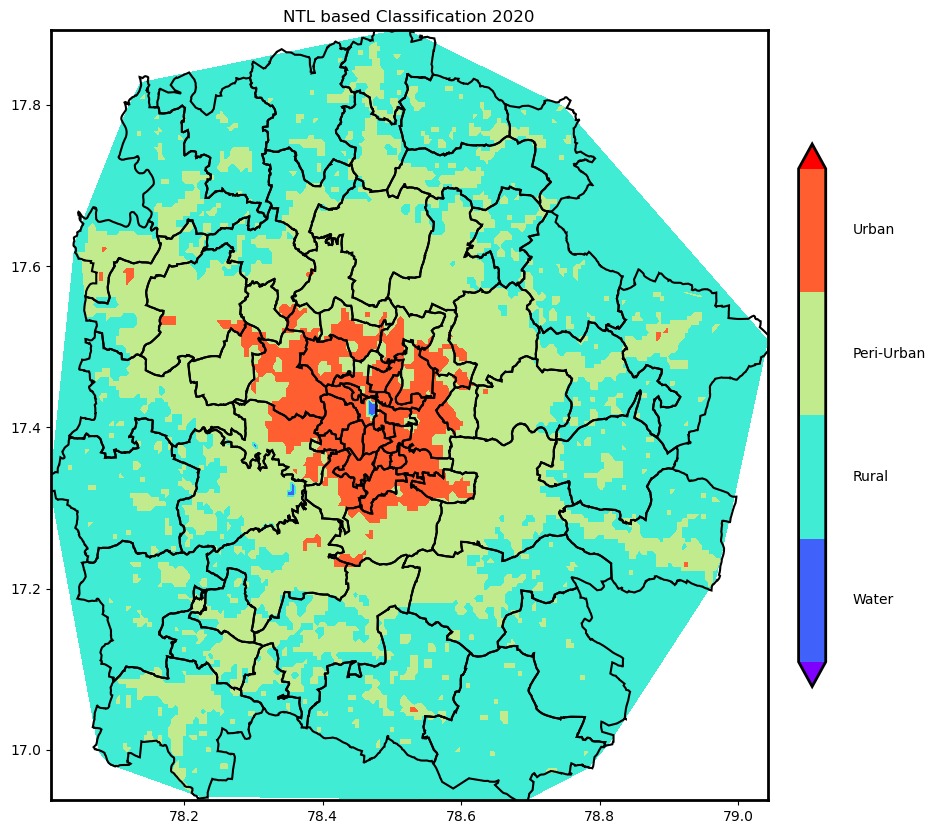

In [159]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from descartes import PolygonPatch
import matplotlib.pyplot as plt
import shapefile
from matplotlib import rc, rcParams
rc('mathtext', default='regular')
rcParams["figure.figsize"] = (10,10)
rcParams['axes.linewidth'] = 2

fig = plt.figure()

NTL_PLOT_NUMLABEL = np.array(NTL_PLOT['LABEL2020'], dtype=float)
a = plt.tricontourf(NTL_PLOT['LON'], NTL_PLOT['LAT'], (NTL_PLOT_NUMLABEL), levels = [1,2,3,4,5], extend='both',cmap="rainbow")

cbar = fig.colorbar(a,fraction=0.035, pad=0.04)
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['Water','Rural','Peri-Urban','Urban']):
    cbar.ax.text(2, (8 * j + 12) / 8.0, lab, ha='left', va='center')
cbar.ax.get_yaxis().labelpad = 15


sf=shapefile.Reader('Shapefile/hmda_boundary.shp')
ax = fig.gca() 
for poly in sf.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='none', ec='black', alpha=1, zorder=1, linewidth=1.5))

ax.set_title('NTL based Classification 2020')
# ax.axis('scaled')
plt.show()

## Work on NDVI and RD

Urban ranges are our truth values as they have been derived from a LULC product. We shall only work on our rural-periurban transition boundary. There are two approaches to this, I shall discuss them when we reach there.

In [145]:
for i in range(26458):
    for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        if NDVI[x].loc[i] >= 0.2175865 and NDVI[x].loc[i] < 0.323695:
            NDVI['LABEL'+x].loc[i] = 'Urban'
        if NTL['LABEL'+x].loc[i] == 'Water':
            NDVI['LABEL'+x].loc[i] = 'Water'


/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [138]:
for i in range(26458):
    for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        if NDVI['LABEL'+x].loc[i] != 'Urban' and NDVI['LABEL'+x].loc[i] != 'Water':
            if NTL['LABEL'+x].loc[i] != 'Urban' and NTL['LABEL'+x].loc[i] != 'Water':
                NDVI['LABEL'+x].loc[i] = NTL['LABEL'+x].loc[i]

In [139]:
NDVI_PLOT = NDVI[['LAT','LON']].copy()
NDVI_PLOT['LABEL2013'] = label
NDVI_PLOT['LABEL2014'] = label
NDVI_PLOT['LABEL2015'] = label
NDVI_PLOT['LABEL2016'] = label
NDVI_PLOT['LABEL2017'] = label
NDVI_PLOT['LABEL2018'] = label
NDVI_PLOT['LABEL2019'] = label
NDVI_PLOT['LABEL2020'] = label

In [140]:
for i in range(26458):
    for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        if NDVI['LABEL'+x].loc[i] == 'Water':
            NDVI_PLOT['LABEL'+x].loc[i] = 1
        elif NDVI['LABEL'+x].loc[i] == "Rural":
            NDVI_PLOT['LABEL'+x].loc[i] = 2
        elif NDVI['LABEL'+x].loc[i] == "Peri-Urban":
            NDVI_PLOT['LABEL'+x].loc[i] = 3
        elif NDVI['LABEL'+x].loc[i] == "Urban":
            NDVI_PLOT['LABEL'+x].loc[i] = 4
        elif NDVI['LABEL'+x].loc[i] == None:
            NDVI_PLOT['LABEL'+x].loc[i] = 5

In [141]:
NDVI_PLOT

,LAT,LON,LABEL2013,LABEL2014,LABEL2015,LABEL2016,LABEL2017,LABEL2018,LABEL2019,LABEL2020
0,17.3225,78.00750,2,2,2,2,2,2,4,2
1,17.3275,78.00750,2,2,2,2,2,2,2,2
2,17.3325,78.00750,2,2,2,2,2,2,2,2
3,17.3225,78.01250,2,2,2,2,2,2,4,2
4,17.3275,78.01250,2,2,2,2,2,2,4,2
...,...,...,...,...,...,...,...,...,...,...
26453,17.5125,79.03250,2,2,2,2,2,2,2,2
26454,17.4975,79.03751,2,2,2,2,2,2,2,2
26455,17.5025,79.03751,2,2,2,2,2,2,2,2
26456,17.5075,79.03751,2,2,2,2,2,2,2,4


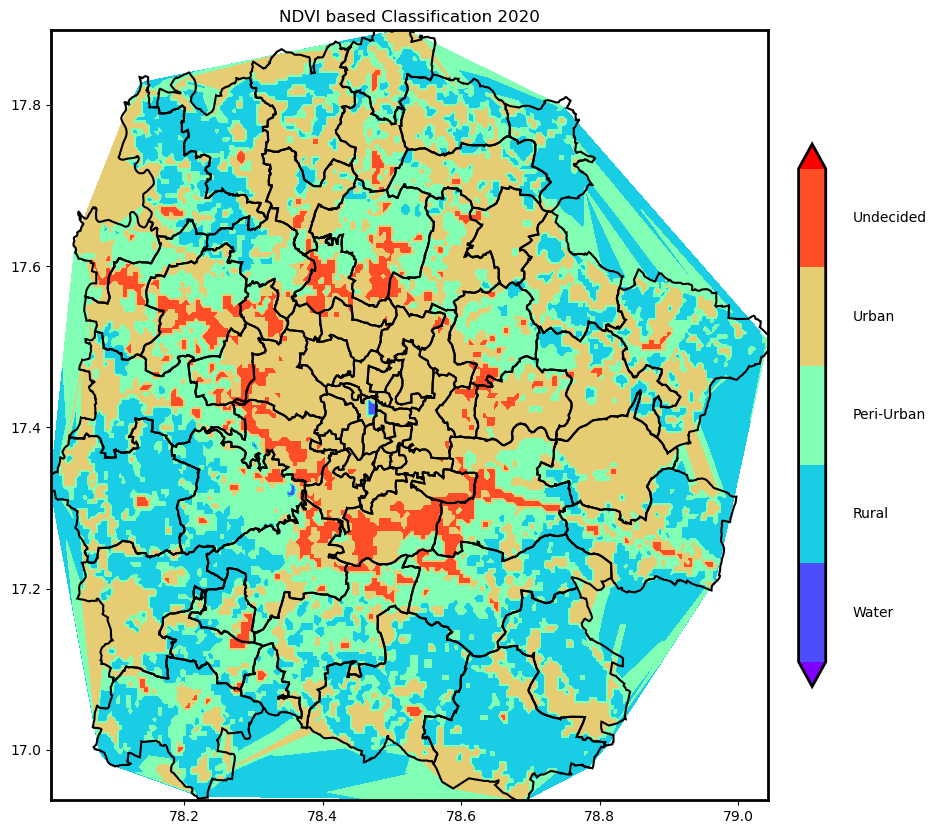

In [142]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from descartes import PolygonPatch
import matplotlib.pyplot as plt
import shapefile
from matplotlib import rc, rcParams
rc('mathtext', default='regular')
rcParams["figure.figsize"] = (10,10)
rcParams['axes.linewidth'] = 2

fig = plt.figure()
NDVI_PLOT_NUMLABEL = np.array(NDVI_PLOT['LABEL2020'], dtype=float)
a = plt.tricontourf(NDVI_PLOT['LON'], NDVI_PLOT['LAT'], (NDVI_PLOT_NUMLABEL), levels = [1,2,3,4,5,6], extend='both',cmap="rainbow")

cbar = fig.colorbar(a,fraction=0.035, pad=0.04)
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['Water','Rural','Peri-Urban','Urban','Undecided']):
    cbar.ax.text(2, (8 * j + 12) / 8.0, lab, ha='left', va='center')
cbar.ax.get_yaxis().labelpad = 15


sf=shapefile.Reader('Shapefile/hmda_boundary.shp')
ax = fig.gca() 
for poly in sf.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='none', ec='black', alpha=1, zorder=1, linewidth=1.5))

ax.set_title('NDVI based Classification 2020')
# ax.axis('scaled')
plt.show()

## NDVI is too random. Let us work with RD for now.

In [162]:
for i in range(26458):
    for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        if RD[x].loc[i] >= 2354.875:  #458.1970:
            RD['LABEL'+x].loc[i] = 'Urban'
        if NTL['LABEL'+x].loc[i] == 'Water':
            RD['LABEL'+x].loc[i] = 'Water'

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [163]:
for i in range(26458):
    for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        if RD['LABEL'+x].loc[i] != 'Urban' and RD['LABEL'+x].loc[i] != 'Water':
            if NTL['LABEL'+x].loc[i] != 'Urban' and NTL['LABEL'+x].loc[i] != 'Water':
                RD['LABEL'+x].loc[i] = NTL['LABEL'+x].loc[i]

RD_PLOT = RD[['LAT','LON']].copy()
RD_PLOT['LABEL2013'] = label
RD_PLOT['LABEL2014'] = label
RD_PLOT['LABEL2015'] = label
RD_PLOT['LABEL2016'] = label
RD_PLOT['LABEL2017'] = label
RD_PLOT['LABEL2018'] = label
RD_PLOT['LABEL2019'] = label
RD_PLOT['LABEL2020'] = label

for i in range(26458):
    for x in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        if RD['LABEL'+x].loc[i] == 'Water':
            RD_PLOT['LABEL'+x].loc[i] = 1
        elif RD['LABEL'+x].loc[i] == "Rural":
            RD_PLOT['LABEL'+x].loc[i] = 2
        elif RD['LABEL'+x].loc[i] == "Peri-Urban":
            RD_PLOT['LABEL'+x].loc[i] = 3
        elif RD['LABEL'+x].loc[i] == "Urban":
            RD_PLOT['LABEL'+x].loc[i] = 4
        elif RD['LABEL'+x].loc[i] == None:
            RD_PLOT['LABEL'+x].loc[i] = 5

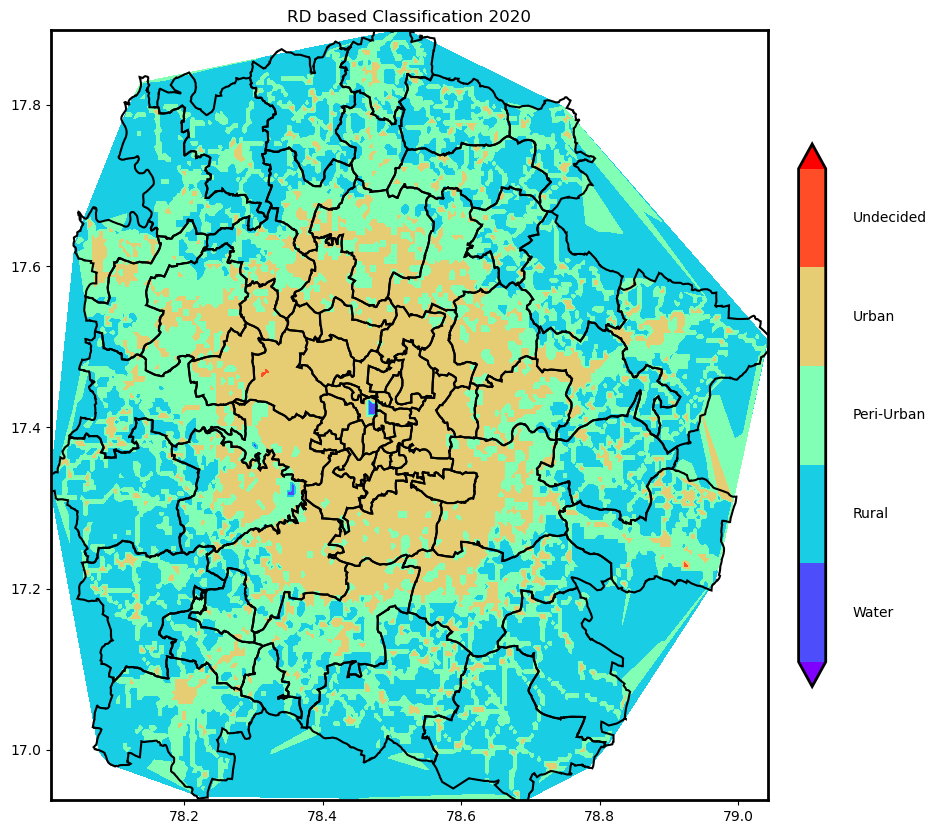

In [166]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from descartes import PolygonPatch
import matplotlib.pyplot as plt
import shapefile
from matplotlib import rc, rcParams
rc('mathtext', default='regular')
rcParams["figure.figsize"] = (10,10)
rcParams['axes.linewidth'] = 2

fig = plt.figure()
RD_PLOT_NUMLABEL = np.array(RD_PLOT['LABEL2020'], dtype=float)
a = plt.tricontourf(RD_PLOT['LON'], RD_PLOT['LAT'], (RD_PLOT_NUMLABEL), levels = [1,2,3,4,5,6], extend='both',cmap="rainbow")

cbar = fig.colorbar(a,fraction=0.035, pad=0.04)
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['Water','Rural','Peri-Urban','Urban','Undecided']):
    cbar.ax.text(2, (8 * j + 12) / 8.0, lab, ha='left', va='center')
cbar.ax.get_yaxis().labelpad = 15


sf=shapefile.Reader('Shapefile/hmda_boundary.shp')
ax = fig.gca() 
for poly in sf.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='none', ec='black', alpha=1, zorder=1, linewidth=1.5))

ax.set_title('RD based Classification 2020')
# ax.axis('scaled')
plt.show()